IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME11: projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et **un seul rendu sur un des deux comptes Moodle doit être fait**.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**Ce TD-TME11 est prévu pour être fait lors de la dernière séance de TD-TME11 de votre groupe.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-11-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2024


## Date de remise 

Le travail doit être rendu (sur le site Moodle) avant le <font size="+1" color="RED"><b>vendredi 17 mai 2024, à 18h</b></font>
    

<b>Il n'y aura pas d'extension de la date de remise autorisée : <font size="+1" color="RED">aucun rendu ne sera accepté après 18h.</font></b>

<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

## Travail à faire

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

Appliquer les algorithmes d'apprentissage non supervisés vus en cours (CAH et k-moyennes) sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- *Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 21 mai 2024**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- tme-11/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.



## Données pour le projet : Pen-Based Recognition of Handwritten Digits

documentation: <a href="https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits" target="NEW">page UCI</a> (mais l'essentiel est donné ci-après).

Pour télécharger les données, la façon la plus simple est d'installer la librairie de l'UCI:

    pip install -U ucimlrepo

ensuite, on peut lancer la boîte suivante.

S'il n'est pas possible d'installer cette librairie, les données sont accessibles sur la page web citée ci-dessus (cliquer sur "Download" en haut et à droite de la page).

In [1]:
# Importation de librairies standards:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time
import umap

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
#from iads import Classifiers as classif

# importation de utils
#from iads import utils as ut

# importation de evaluation
#from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

/home/massilva/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/massilva/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/massilva/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarni

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Chargement des données

In [2]:
try:
    from ucimlrepo import fetch_ucirepo, list_available_datasets
    
    # check which datasets can be imported
    #list_available_datasets()
    
    # import dataset
    pen_dataset = fetch_ucirepo(id=81)
    
    # access data
    X = pen_dataset.data.features
    y = pen_dataset.data.targets
    
    # access metadata
    #print(pen_dataset.metadata.uci_id)
    #print(pen_dataset.metadata.num_instances)
    #print(pen_dataset.metadata.additional_info.summary)
    
    # access variable info in tabular format
    #print(pen_dataset.variables)'''
except:
    X = pd.read_csv("X.csv")
    y = pd.read_csv("y.csv")

### Apprentissage non-supervisé

Pour ce sujet, vous considèrerez seulement les données de description (features X) sur lesquelles vous proposerez des expérimentations des algorithmes d'apprentissage non-supervisé vus en cours mettant en évidence des clusters et leur évaluation.

Ainsi, vous devrez:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).


   


In [3]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0
10988,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14
10989,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93
10990,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81


In [4]:
y

,Class
0,8
1,2
2,1
3,4
4,1
...,...
10987,4
10988,2
10989,0
10990,0


In [5]:
nb_lig, nb_colonne = X.shape
X_np = np.array(X)
Y_np = np.array([y["Class"][i] for i in range(nb_lig)])
Y_np1 = np.unique(Y_np)
Y_np = len(Y_np1)
Y_np

10

In [6]:
classe_majo = clust.classe_majoritaire(y)

print("Classe majoritaire: ", classe_majo)
print(f'Entropie: {clust.entropie(y):0.3f}')

Classe majoritaire:  2
Entropie: 1.000


In [7]:
def visualize(X, Y):
    W, V = np.linalg.eig(X.T @ X)
    i, j = np.argsort(W)[-2:]
    Xj = np.dot(X, V.T[j])
    Xi = np.dot(X, V.T[i])
    n = len(np.unique(Y))
    
    plt.figure(figsize=(15, 12)) 
    for y in range(n):
        indices = np.where(Y == y)[0]  
        plt.scatter(Xj[indices], Xi[indices])
    plt.show()


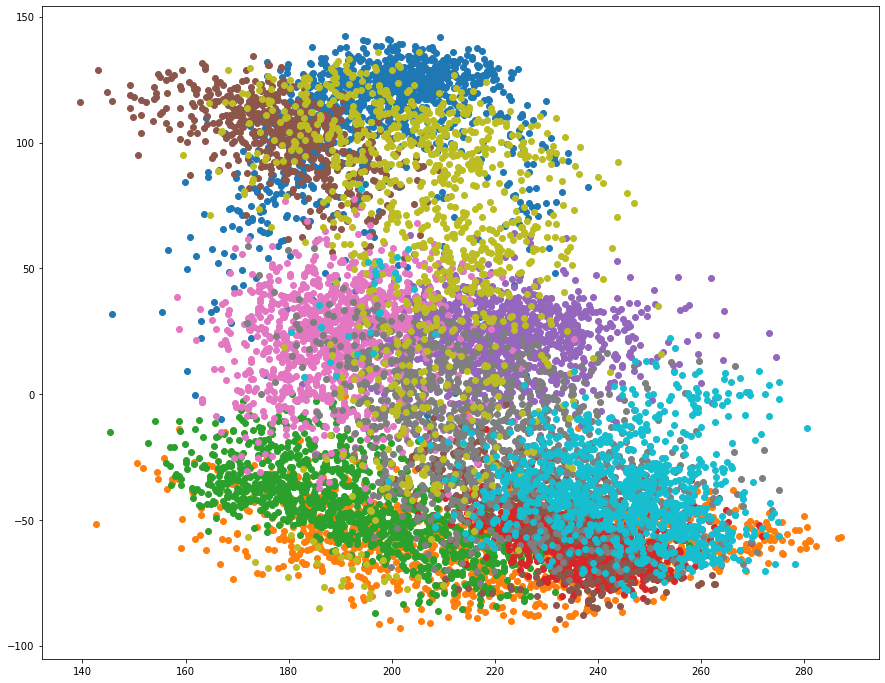

In [8]:
visualize(X, y)

### Le poster

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données *Pen-Based Recognition of Handwritten Digits*, les résultats obtenus lors de l'apprentissage supervisé (études et résultats de votre TME-10) et lors de l'apprentissage non-supervisé (études et résultats de votre TME-11) ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Attribute1   10992 non-null  int64
 1   Attribute2   10992 non-null  int64
 2   Attribute3   10992 non-null  int64
 3   Attribute4   10992 non-null  int64
 4   Attribute5   10992 non-null  int64
 5   Attribute6   10992 non-null  int64
 6   Attribute7   10992 non-null  int64
 7   Attribute8   10992 non-null  int64
 8   Attribute9   10992 non-null  int64
 9   Attribute10  10992 non-null  int64
 10  Attribute11  10992 non-null  int64
 11  Attribute12  10992 non-null  int64
 12  Attribute13  10992 non-null  int64
 13  Attribute14  10992 non-null  int64
 14  Attribute15  10992 non-null  int64
 15  Attribute16  10992 non-null  int64
dtypes: int64(16)
memory usage: 1.3 MB


In [10]:
X.describe()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
count,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,38.814320,85.120269,40.605622,83.774199,49.770378,65.573144,51.220251,44.498999,56.868541,33.695961,60.516376,34.826510,55.022289,34.937045,47.287482,28.845342
std,34.257783,16.218571,26.342984,19.163646,34.100515,26.996688,30.576881,29.906104,34.135530,27.251548,37.288086,27.119982,22.335539,33.155463,41.760400,35.778094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,76.000000,20.000000,72.000000,18.000000,49.000000,28.000000,23.000000,29.000000,7.000000,23.000000,11.000000,42.000000,5.000000,0.000000,0.000000
50%,32.000000,89.000000,40.000000,91.000000,53.000000,71.000000,53.500000,43.000000,60.000000,33.000000,73.000000,30.000000,53.000000,27.000000,40.000000,9.000000
75%,65.000000,100.000000,58.000000,100.000000,78.000000,86.000000,74.000000,64.000000,89.000000,54.000000,97.000000,55.000000,68.000000,47.000000,100.000000,51.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [11]:
res = clust.normalisation(X)
res

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,0.47,1.00,0.27,0.81,0.57,0.37,0.26,0.00,0.00,0.23,0.56,0.53,1.00,0.90,0.40,0.98
1,0.00,0.89,0.27,1.00,0.42,0.75,0.29,0.45,0.15,0.15,0.37,0.00,0.69,0.02,1.00,0.06
2,0.00,0.57,0.31,0.68,0.72,0.90,1.00,1.00,0.76,0.75,0.50,0.51,0.28,0.25,0.16,0.00
3,0.00,1.00,0.07,0.92,0.05,0.68,0.19,0.45,0.86,0.34,1.00,0.45,0.74,0.23,0.67,0.00
4,0.00,0.67,0.49,0.83,1.00,1.00,0.81,0.80,0.60,0.60,0.40,0.40,0.33,0.20,0.47,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,0.36,1.00,0.24,0.70,0.00,0.38,0.49,0.33,0.95,0.47,0.87,0.55,0.96,0.21,1.00,0.00
10988,0.16,0.75,0.41,1.00,0.52,0.64,0.32,0.27,0.00,0.00,0.21,0.09,0.62,0.02,1.00,0.14
10989,0.56,1.00,0.27,0.79,0.00,0.39,0.12,0.00,0.66,0.15,1.00,0.51,0.93,0.93,0.38,0.93
10990,0.19,1.00,0.00,0.61,0.03,0.23,0.48,0.00,0.97,0.27,1.00,0.66,0.62,0.97,0.10,0.81


## K-Moyennes sur le dataset 
Utilisation de l'algorithme des K-Moyennes sur le dataset et faire différentes analyses et evaluations.

In [12]:
mini = umap.UMAP()

In [13]:
res = mini.fit_transform(X)

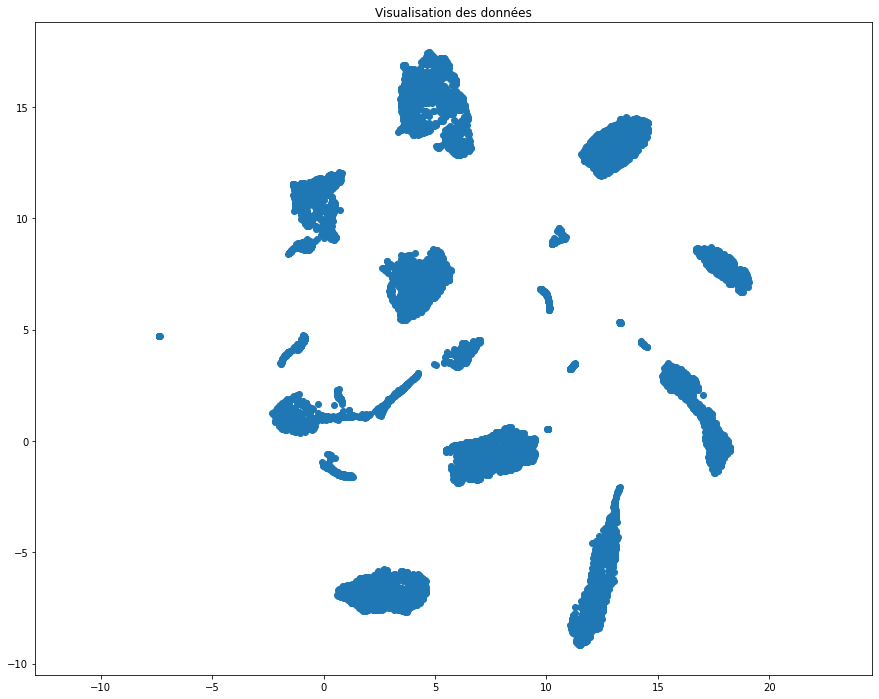

In [14]:
plt.figure(figsize=(15, 12))
plt.title('Visualisation des données')
plt.scatter(res[:, 0], res[:, 1], cmap='Paired')
plt.gca().set_aspect('equal', 'datalim')

In [15]:
data = np.array(clust.normalisation(X))

In [16]:
data

array([[0.47, 1.  , 0.27, ..., 0.9 , 0.4 , 0.98],
       [0.  , 0.89, 0.27, ..., 0.02, 1.  , 0.06],
       [0.  , 0.57, 0.31, ..., 0.25, 0.16, 0.  ],
       ...,
       [0.56, 1.  , 0.27, ..., 0.93, 0.38, 0.93],
       [0.19, 1.  , 0.  , ..., 0.97, 0.1 , 0.81],
       [0.38, 1.  , 0.37, ..., 0.26, 0.65, 0.  ]])

In [17]:
test = clust.init_kmeans(12,data)
test

array([[0.18, 0.99, 0.06, 0.51, 0.22, 0.06, 0.69, 0.  , 1.  , 0.37, 0.9 ,
        0.83, 0.44, 1.  , 0.  , 0.8 ],
       [0.03, 0.67, 0.43, 0.91, 0.57, 1.  , 0.49, 0.63, 0.36, 0.27, 0.  ,
        0.  , 0.43, 0.04, 1.  , 0.05],
       [0.25, 0.87, 0.53, 1.  , 0.65, 0.64, 0.38, 0.33, 0.  , 0.19, 0.46,
        0.19, 0.87, 0.  , 1.  , 0.31],
       [0.35, 0.8 , 0.73, 1.  , 0.95, 0.84, 0.55, 0.62, 1.  , 0.44, 0.97,
        0.14, 0.49, 0.  , 0.  , 0.09],
       [0.94, 1.  , 0.52, 0.78, 0.24, 0.5 , 0.13, 0.21, 0.47, 0.  , 1.  ,
        0.15, 0.53, 0.3 , 0.  , 0.18],
       [0.  , 0.64, 0.23, 1.  , 0.74, 0.84, 0.75, 0.42, 0.61, 0.  , 0.06,
        0.01, 0.36, 0.3 , 1.  , 0.37],
       [1.  , 0.77, 0.53, 0.73, 0.18, 0.92, 0.6 , 1.  , 0.84, 0.74, 0.71,
        0.42, 0.41, 0.16, 0.  , 0.  ],
       [1.  , 1.  , 0.58, 0.88, 0.22, 0.63, 0.  , 0.31, 0.08, 0.  , 0.56,
        0.09, 0.59, 0.39, 0.07, 0.47],
       [0.4 , 0.82, 0.1 , 0.76, 0.59, 0.42, 0.66, 0.  , 0.  , 0.07, 0.  ,
        0.46, 0.32, 0.

In [18]:
C_i, U_i = clust.kmoyennes(9, X, eps=0.05, iter_max=100, verbose=True)

iteration 0 Inertie : 63809930.3172 Difference: 63809930.3172
iteration 1 Inertie : 60042027.1661 Difference: 3767903.1512
iteration 2 Inertie : 58399391.6263 Difference: 1642635.5397
iteration 3 Inertie : 57500510.5284 Difference: 898881.0980
iteration 4 Inertie : 56912246.7228 Difference: 588263.8056
iteration 5 Inertie : 56624002.0443 Difference: 288244.6784
iteration 6 Inertie : 56457801.6309 Difference: 166200.4134
iteration 7 Inertie : 56358167.0634 Difference: 99634.5675
iteration 8 Inertie : 56300474.6863 Difference: 57692.3772
iteration 9 Inertie : 56246953.5215 Difference: 53521.1648
iteration 10 Inertie : 56211670.1640 Difference: 35283.3575
iteration 11 Inertie : 56178538.4111 Difference: 33131.7529
iteration 12 Inertie : 56129363.7459 Difference: 49174.6652
iteration 13 Inertie : 56085613.8893 Difference: 43749.8566
iteration 14 Inertie : 56040372.8966 Difference: 45240.9927
iteration 15 Inertie : 55976370.9718 Difference: 64001.9248
iteration 16 Inertie : 55857752.1842 Di

In [19]:
fit = mini.fit_transform(X)

**Visualisation des centres**

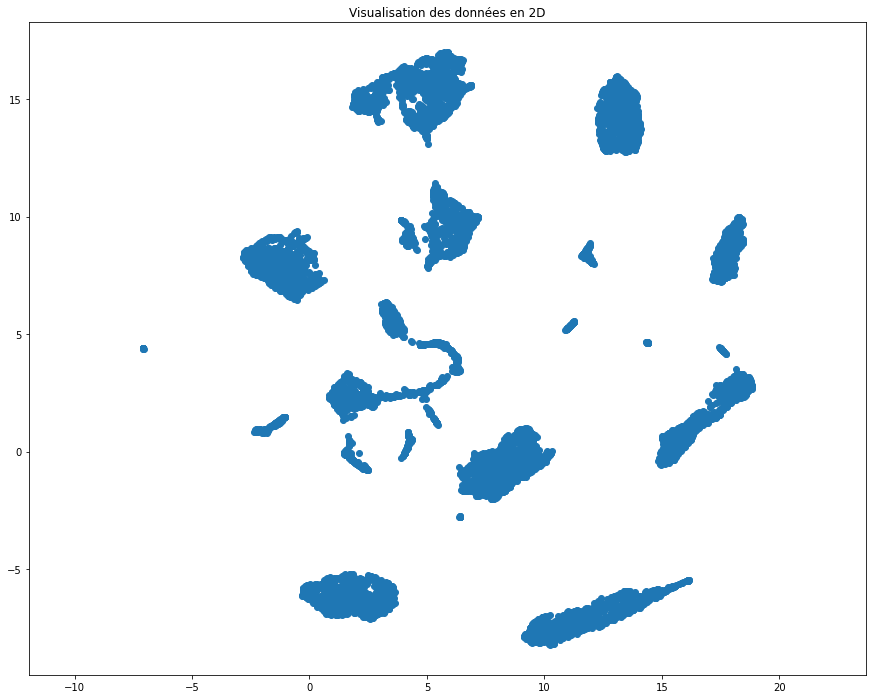

In [20]:
plt.figure(figsize=(15, 12))
plt.title('Visualisation des données en 2D')
plt.scatter(fit[:, 0], fit[:, 1], cmap='Paired')
plt.gca().set_aspect('equal', 'datalim')

In [21]:
fitt = mini.fit_transform(X)

In [22]:
labels = []
for c, xs in U_i.items():
    for x in xs:
        labels.append([x, c])
labels = np.array(labels)
labels = labels[np.argsort(labels[:, 0])]
labels = labels[:, 1]
labels

array([6, 5, 2, ..., 6, 3, 1])

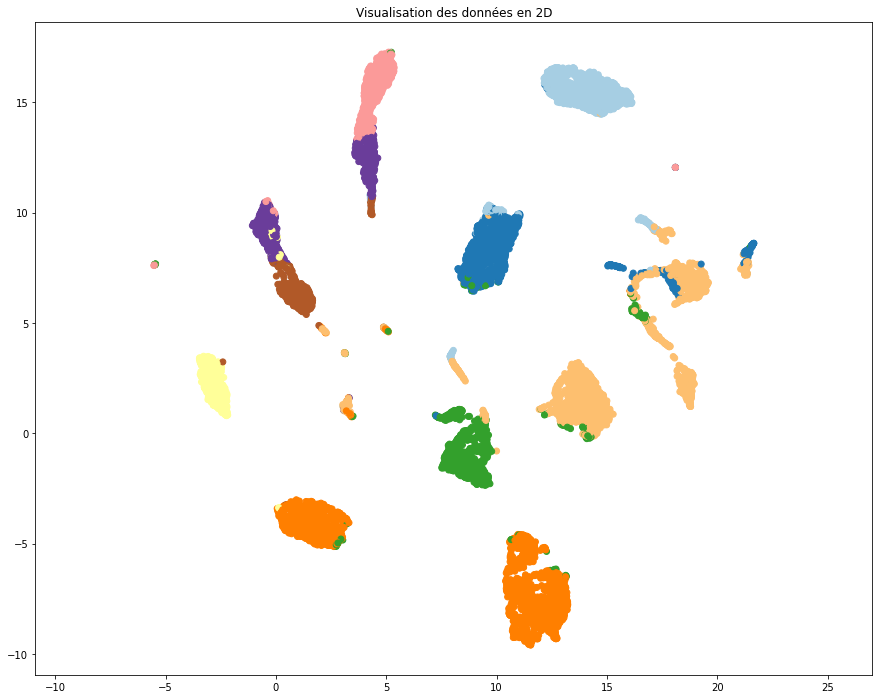

In [23]:
plt.figure(figsize=(15, 12))
plt.title('Visualisation des données en 2D')
plt.scatter(fitt[:, 0], fitt[:, 1], c=labels, cmap='Paired')
plt.gca().set_aspect('equal', 'datalim')

### Evaluation des perfomances :
> Comme nous l'avons fait dans le dernier chapitre de l'UE : Index de dunn et index de Xie-Beni.
> Pour notre cas, nous allons juste utiliser l'indice de Dunn. On a quand meme defini la fonction `index de Xie-Beni`

#### _Index de Dunn_

In [24]:
print('Index de Dunn de la partition :', clust.index_dunn(X, U_i))

Index de Dunn de la partition : 3.7829435305163944e-05


#### _index de Xie-Beni_

In [25]:
print('Index de Xie-Beni de la partition :', clust.index_xie_beni(X,C_i, U_i))

Index de Xie-Beni de la partition : 543648.4423621695


#### Evaluation pour differentes valeurs de k

In [53]:
K = np.arange(1, 12)
dunn = []
for k in K:
    C, U = clust.kmoyennes(k, X, eps=0.05, iter_max=100, verbose=False)
    dunn.append(clust.index_dunn(X, U))

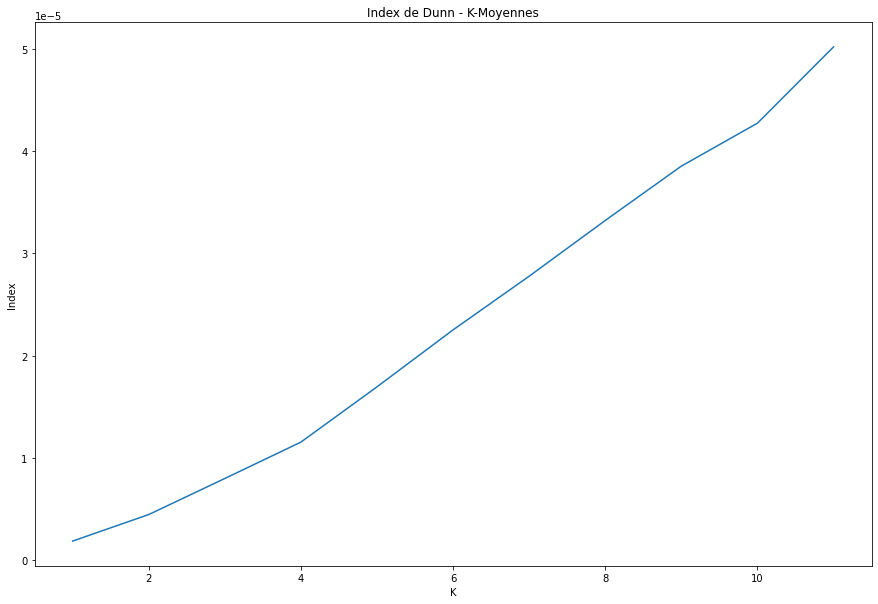

In [54]:
plt.figure(figsize=(15, 10))
plt.title('Index de Dunn - K-Moyennes')
plt.plot(K, dunn)
plt.xlabel('K')
plt.ylabel('Index')
plt.show()

#### **Pour k = 12**

In [29]:
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

les_centres, l_affectation = clust.kmoyennes(12, X, 0.05, 100)

print("Affichage des centres: ",les_centres)


iteration 0 Inertie : 70273967.2161 Difference: 70273967.2161
iteration 1 Inertie : 62190989.7315 Difference: 8082977.4846
iteration 2 Inertie : 54862999.0465 Difference: 7327990.6850
iteration 3 Inertie : 49516793.0775 Difference: 5346205.9690
iteration 4 Inertie : 47258669.2061 Difference: 2258123.8713
iteration 5 Inertie : 46374069.0738 Difference: 884600.1323
iteration 6 Inertie : 46104490.4041 Difference: 269578.6697
iteration 7 Inertie : 45981921.3236 Difference: 122569.0805
iteration 8 Inertie : 45893364.7180 Difference: 88556.6056
iteration 9 Inertie : 45797918.0559 Difference: 95446.6622
iteration 10 Inertie : 45717709.3135 Difference: 80208.7424
iteration 11 Inertie : 45633585.9181 Difference: 84123.3954
iteration 12 Inertie : 45578264.0718 Difference: 55321.8463
iteration 13 Inertie : 45539632.5539 Difference: 38631.5179
iteration 14 Inertie : 45501954.6622 Difference: 37677.8917
iteration 15 Inertie : 45489181.8529 Difference: 12772.8094
iteration 16 Inertie : 45484404.3800

In [30]:
for i in range(len(X)):
    proche = clust.plus_proche(X.iloc[i],test)
    #print("L'exemple X ",i," est le plus proche du centroide ",proche)

#### **Pour k = 9**

In [31]:
test_2 = clust.init_kmeans(9,data)
test_2
for i in range(len(X)):
    proche = clust.plus_proche(X.iloc[i],test_2)
    #print("L'exemple X ",i," est le plus proche du centroide ",proche)

In [32]:
K = np.arange(1, 12)
pp = []
for k in K:
    C, U = clust.kmoyennes(k, X, eps=0.05, iter_max=100, verbose=False)
    pp.append(clust.plus_proche(X.iloc[i],test_2))

#### **Les resultats pour juste une partition 10 premiers exemples**

>Vu que les exemples du dataset sont assez immenses, on a choisis d'afficher avec les k-means juste les 10 premiers exemples et montrer leurs centres au bout de 10 clusters


>Mais les resultats avec tous les exemples sont ci-dessus ` cet affichage`

In [45]:
test_2 = clust.init_kmeans(9,data)
test_2

pp = []
ex = []
for i in range(10):
    proche = clust.plus_proche(X.iloc[i],test_2)
    #print("L'exemple X ",i," est le plus proche du centroide ",proche)
    pp.append(proche)
    ex.append(i)
df = pd.DataFrame({
    'Les exemples ': ex,
    'Les centres ' : pp
})
df

,Les exemples,Les centres
0,0,6
1,1,4
2,2,4
3,3,2
4,4,4
5,5,4
6,6,7
7,7,7
8,8,8
9,9,6


In [46]:
K = np.arange(1, 12)
pp = []
for k in K:
    C, U = clust.kmoyennes(k, X, eps=0.05, iter_max=100, verbose=False)
    pp.append(clust.plus_proche(X.iloc[i],test_2))

#### **Pour k = 10**

In [47]:
test_3 = clust.init_kmeans(10,data)
test_3
pp = []
ex = []
for i in range(len(X)):
    proche = clust.plus_proche(X.iloc[i],test_3)
    #print("L'exemple X ",i," est le plus proche du centroide ",proche)
    pp.append(proche)
    ex.append(i)
df = pd.DataFrame({
    'Les exemples ': ex,
    'Les centres ' : pp
})
df

,Les exemples,Les centres
0,0,9
1,1,6
2,2,7
3,3,7
4,4,7
...,...,...
10987,10987,9
10988,10988,6
10989,10989,9
10990,10990,4


In [56]:
test_3 = clust.init_kmeans(10,data)
test_3

pp = []
ex = []
for i in range(10):
    proche = clust.plus_proche(X.iloc[i],test_2)
    #print("L'exemple X ",i," est le plus proche du centroide ",proche)
    pp.append(proche)
    ex.append(i)
df = pd.DataFrame({
    'Les exemples ': ex,
    'Les centres ' : pp
})
df

,Les exemples,Les centres
0,0,6
1,1,4
2,2,4
3,3,2
4,4,4
5,5,4
6,6,7
7,7,7
8,8,8
9,9,6


## CAH sur le dataset 

On prend un échantillon aléatoire du dataset.

In [33]:
taille_echant = 30

for j in range(1000):
    indices_echant = np.arange(nb_lig)
    np.random.shuffle(indices_echant)
    X_echant = clust.normalisation(X.iloc[indices_echant].iloc[0:taille_echant].reset_index(drop=True))
    y_echant = y.iloc[indices_echant].iloc[0:taille_echant].reset_index(drop=True)
    y_echant_arr = y_echant.to_numpy().reshape(taille_echant)
    k = len(np.unique(y_echant_arr))
    if k==10:
        break

assert k==10
print(f"L'échantillon contient {k} labels différents")

print(f"Indices des {taille_echant} exemples sélectionnés : {indices_echant}")

L'échantillon contient 10 labels différents
Indices des 30 exemples sélectionnés : [ 107 5478 8439 ... 5390  860 7270]


In [34]:
X_echant

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,0.27,1.000000,0.000000,0.373134,0.12,0.05,0.62,0.00,1.00,0.464286,0.97,0.91,0.48,0.97,0.18,0.53
1,1.00,0.536585,0.553191,1.000000,0.06,0.75,0.00,0.39,0.31,0.071429,0.90,0.00,0.68,0.30,0.10,0.19
2,0.20,0.170732,0.361702,1.000000,0.41,0.74,0.29,0.32,0.00,0.000000,0.08,0.00,0.54,0.04,1.00,0.11
3,0.38,0.292683,0.510638,0.925373,1.00,1.00,0.87,0.72,0.83,0.571429,0.92,0.20,0.49,0.00,0.00,0.00
4,0.25,0.536585,0.457447,1.000000,0.46,0.61,0.29,0.27,0.00,0.059524,0.34,0.02,0.68,0.00,1.00,0.07
5,0.00,0.878049,0.457447,1.000000,0.89,0.94,0.73,0.51,0.62,0.071429,0.47,0.00,0.51,0.35,1.00,0.38
6,0.00,0.000000,0.095745,0.044776,0.43,0.00,0.91,0.20,1.00,0.773810,0.65,1.00,0.15,0.84,0.10,0.41
7,1.00,0.902439,0.691489,0.970149,0.61,0.80,0.99,1.00,0.81,0.785714,0.60,0.32,0.34,0.00,0.00,0.00
8,1.00,1.000000,0.648936,0.850746,0.71,0.68,0.95,0.88,0.94,0.642857,0.79,0.22,0.41,0.00,0.00,0.13
9,0.23,0.731707,0.627660,1.000000,0.75,0.68,0.58,0.33,0.36,0.000000,0.00,0.18,0.48,0.27,1.00,0.32


In [35]:
y_echant_arr

array([0, 6, 1, 3, 2, 7, 0, 9, 9, 7, 2, 7, 4, 2, 8, 0, 3, 3, 3, 0, 9, 3,
       2, 4, 3, 3, 5, 5, 9, 3])

On utilise CHA2 une version modifiée de la fonction CHA qui permet d'afficher les labels des exemples (ainsi on voit les chiffres sur le dendrogramme), et qui renvoie la liste des différentes clusterisations à chaque étape de l'algorithme. 
On pourra ainsi afficher une division en k groupes (k est le nombre de labels différents, donc k=10).

#### Test avec linkage="centroid"

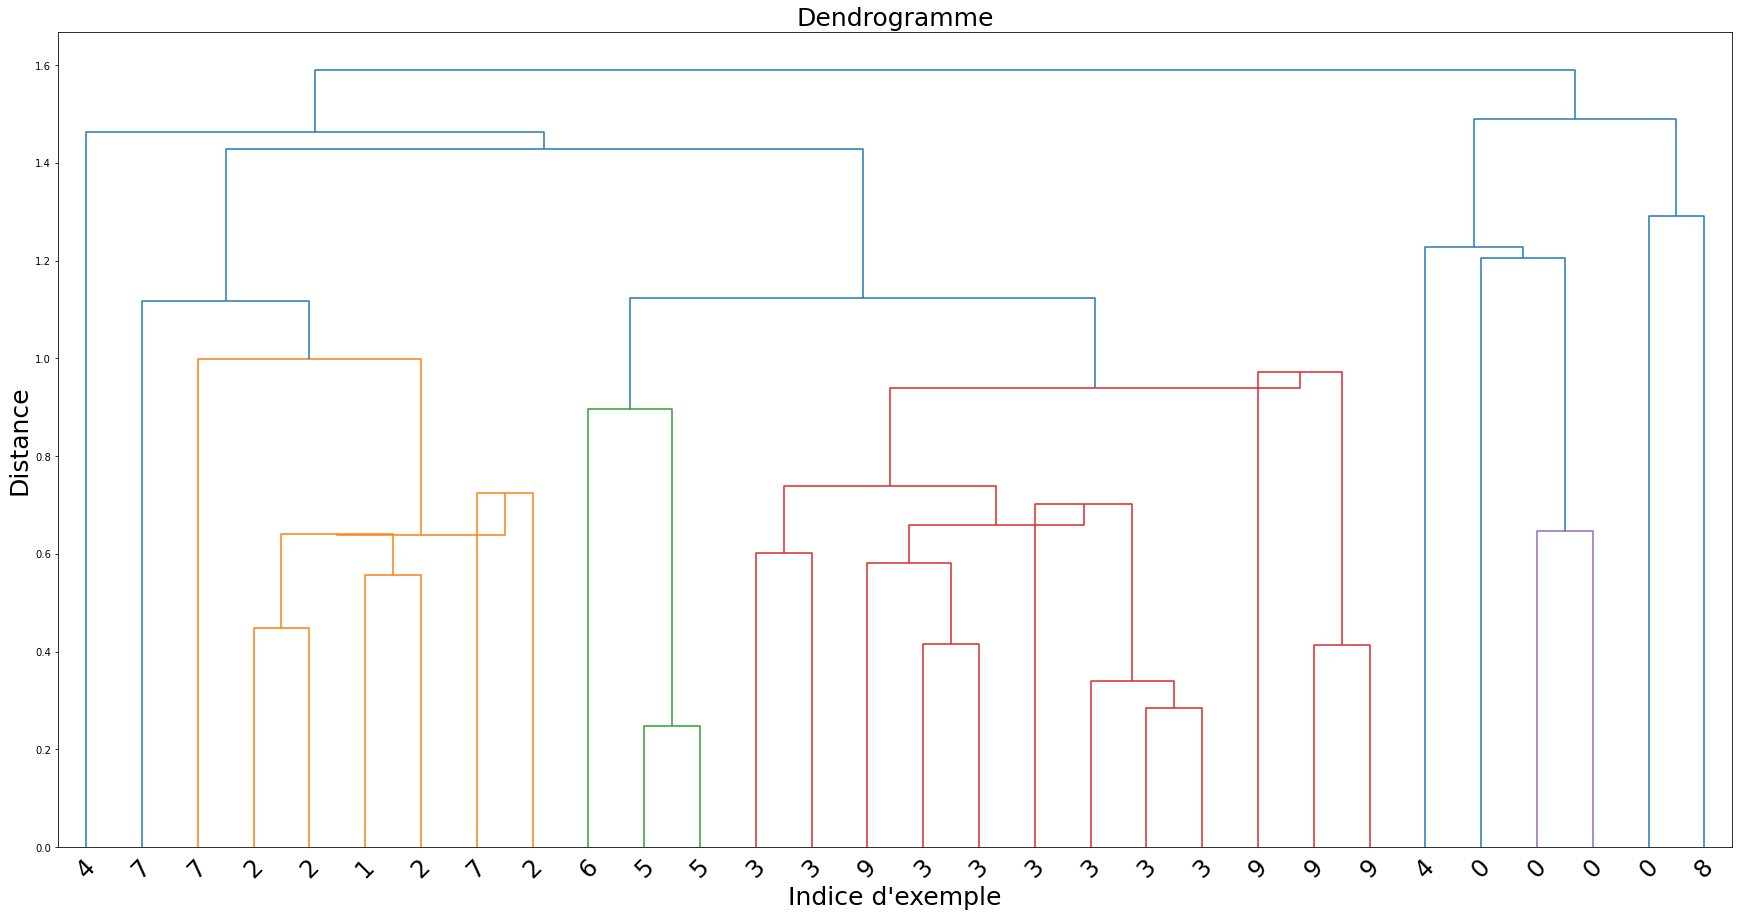

division en 10 groupes :
[0]
[0]
[7]
[4]
[8]
[4]
[0, 0]
[6, 5, 5]
[3, 3, 9, 3, 3, 3, 3, 3, 3, 9, 9, 9]
[7, 2, 2, 1, 2, 7, 2]


In [36]:
res, L_groupes_k = clust.CHA2(X_echant, linkage="centroid", dendrogramme=True, labels=y_echant_arr)
print(f"division en {k} groupes :")
groupes_k = L_groupes_k[len(L_groupes_k)-k]
for cle in groupes_k:
    print([y_echant_arr[i] for i in groupes_k[cle]])

#### Test avec linkage="complete"

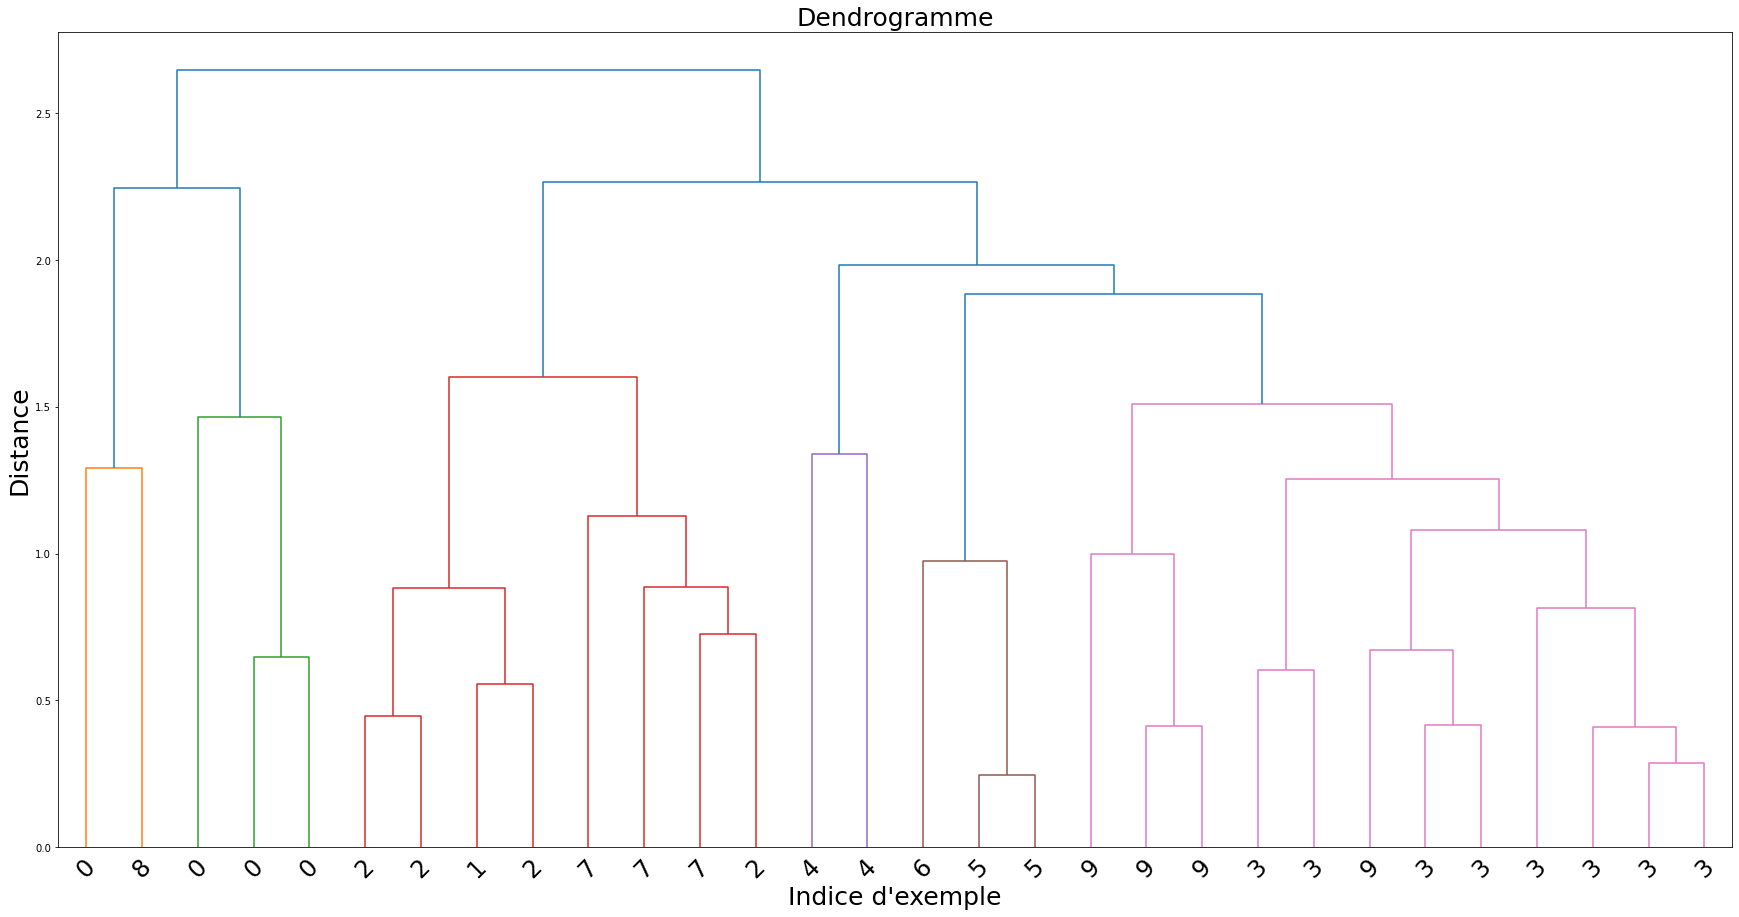

division en 10 groupes :
[0]
[4]
[4]
[0, 0]
[2, 2, 1, 2]
[6, 5, 5]
[9, 9, 9]
[7, 7, 7, 2]
[3, 3, 9, 3, 3, 3, 3, 3, 3]
[0, 8]


In [37]:
res, L_groupes_k = clust.CHA2(X_echant, linkage="complete", dendrogramme=True, labels=y_echant_arr)
print(f"division en {k} groupes :")
groupes_k = L_groupes_k[len(L_groupes_k)-k]
for cle in groupes_k:
    print([y_echant_arr[i] for i in groupes_k[cle]])

#### Test avec linkage="simple"

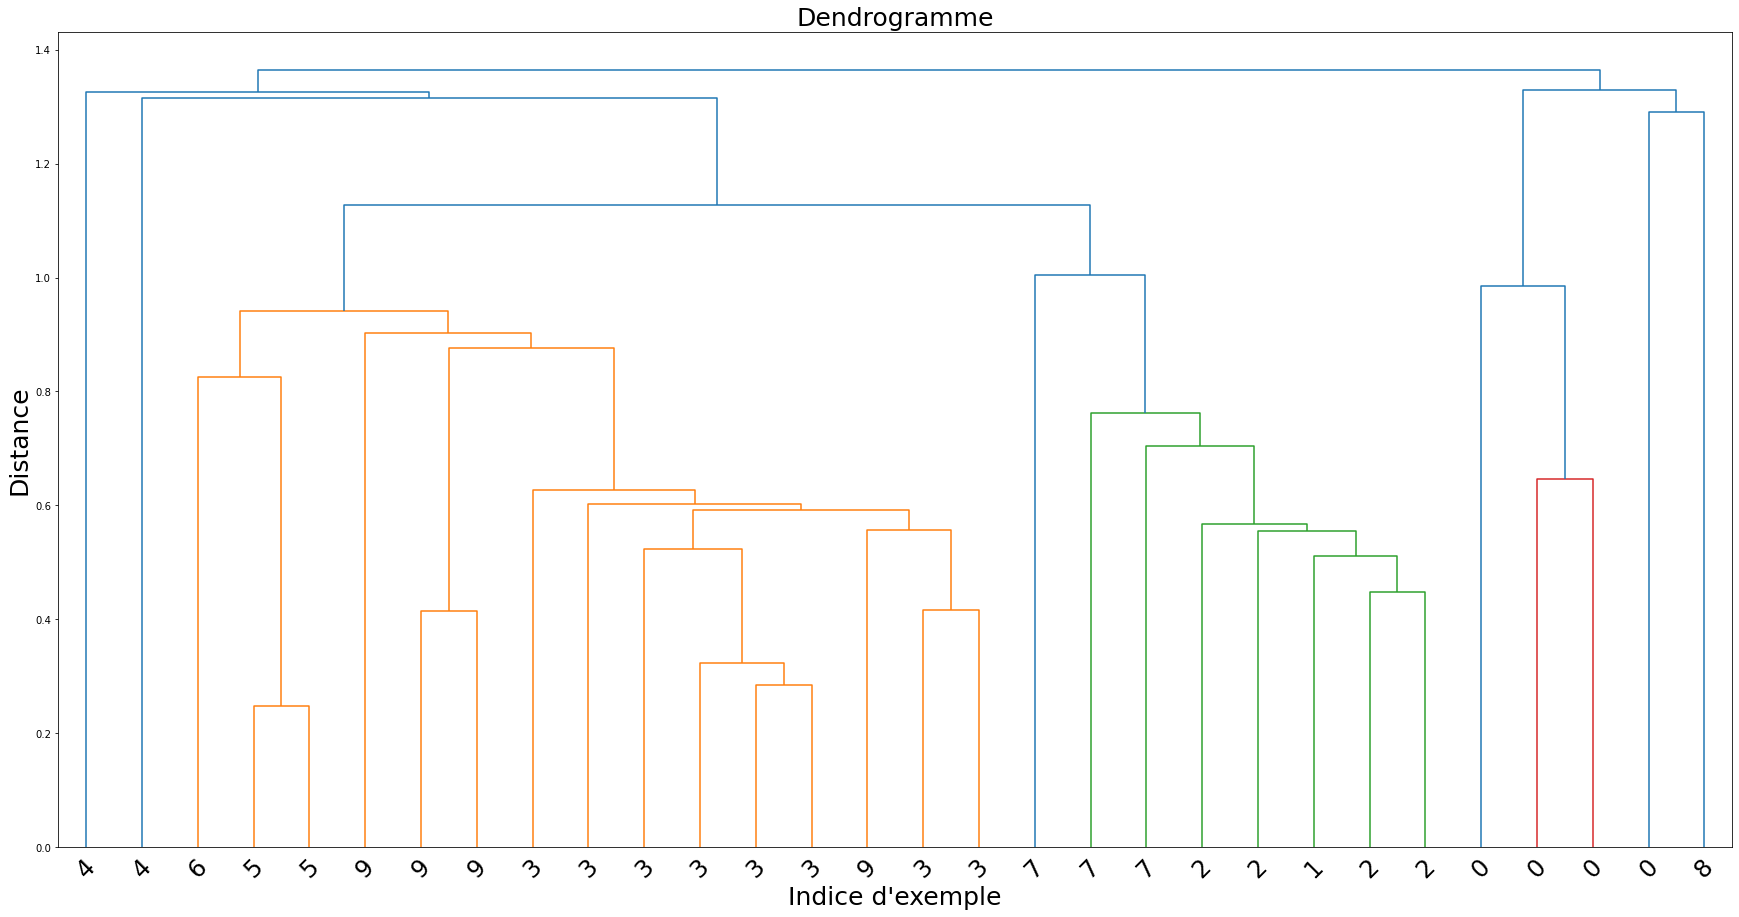

division en 10 groupes :
[0]
[0]
[7]
[4]
[8]
[4]
[0, 0]
[7, 7, 2, 2, 1, 2, 2]
[6, 5, 5]
[9, 9, 9, 3, 3, 3, 3, 3, 3, 9, 3, 3]


In [38]:
res, L_groupes_k = clust.CHA2(X_echant, linkage="simple", dendrogramme=True, labels=y_echant_arr)
print(f"division en {k} groupes :")
groupes_k = L_groupes_k[len(L_groupes_k)-k]
for cle in groupes_k:
    print([y_echant_arr[i] for i in groupes_k[cle]])

#### Test avec linkage="average"

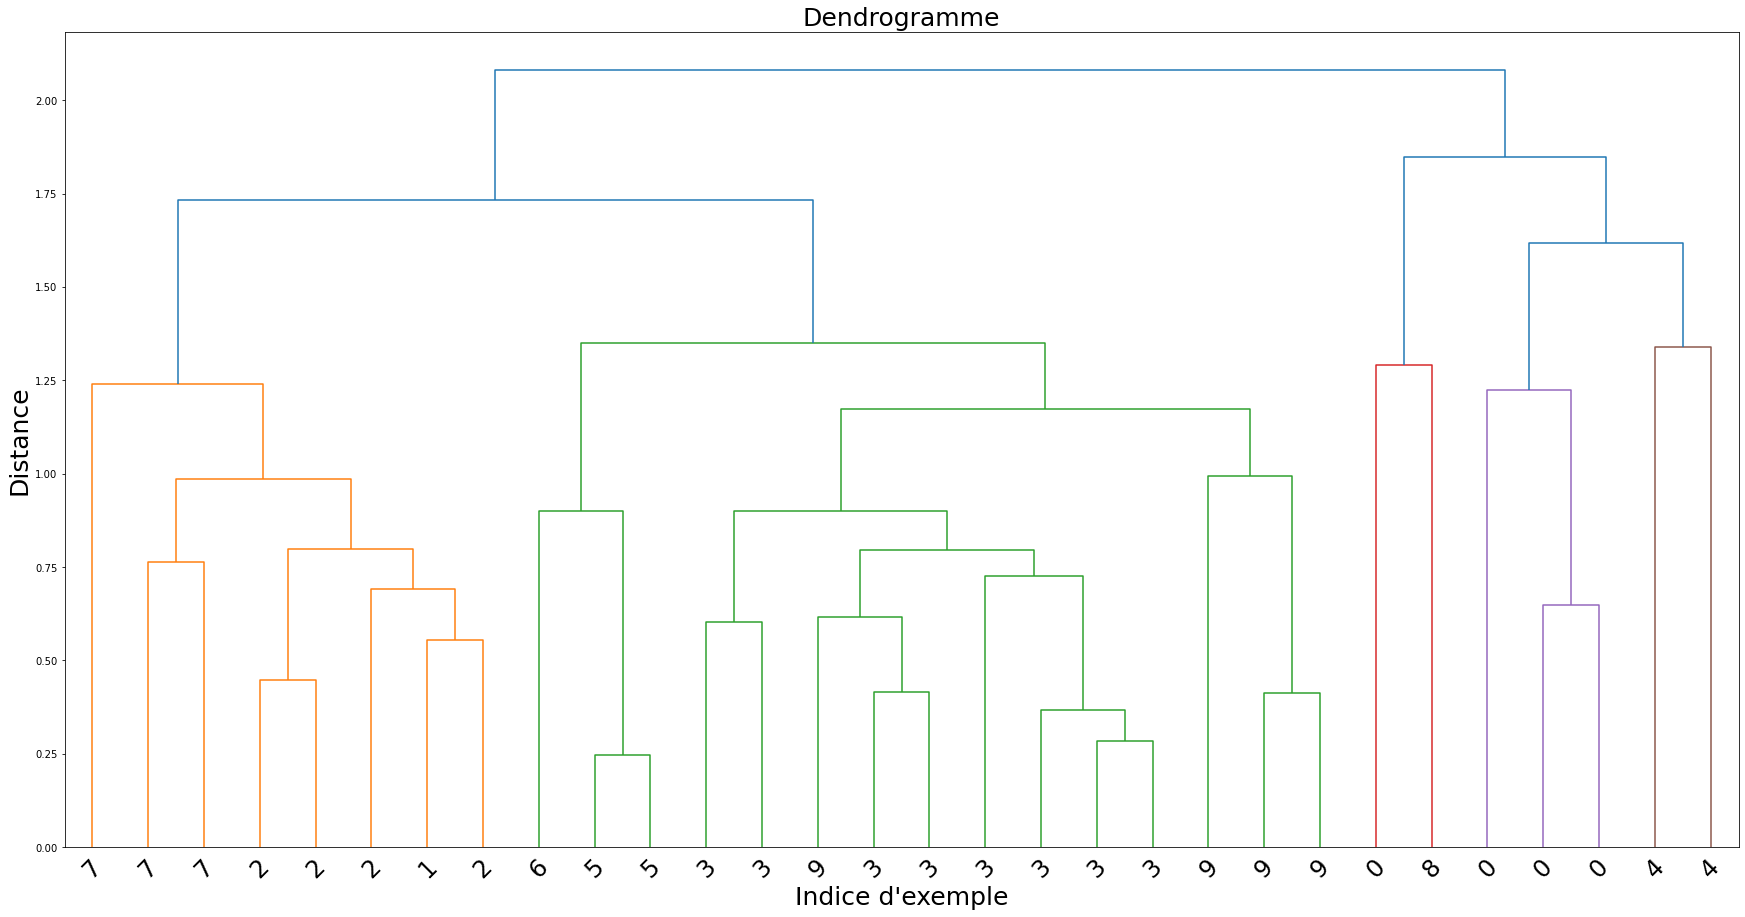

division en 10 groupes :
[0]
[0]
[7]
[4]
[8]
[4]
[0, 0]
[6, 5, 5]
[7, 7, 2, 2, 2, 1, 2]
[3, 3, 9, 3, 3, 3, 3, 3, 3, 9, 9, 9]


In [39]:
res, L_groupes_k = clust.CHA2(X_echant, linkage="average", dendrogramme=True, labels=y_echant_arr)
print(f"division en {k} groupes :")
groupes_k = L_groupes_k[len(L_groupes_k)-k]
for cle in groupes_k:
    print([y_echant_arr[i] for i in groupes_k[cle]])

Les 4 versions de l'algorithme semblent faire des "erreurs" : 
par exemple en classant un exemple de label x dans un cluster Cy qui contient majoritairement des exemples de label y, alors qu'il y a un autre cluster Cx qui contient majoritairement des exemples de label x.
(Dans la cellule ci-dessus un 9 a été mis dans un cluster avec deux 4 alors qu'il y avait un cluster contenant deux 9)

On remarque des différences de clusterisation selon le type de linkage, on peut alors se demander quel est le linkage le plus pertinent pour ce type de dataset.

#### Proposition d'évaluation de la qualité d'un dendrogramme
Voici une fonction qui prend en paramètre une division en k groupes d'un dendrogrammes et qui donne la proportion des exemples dont le label correspond au label majoritaire de leur groupe.

In [40]:
def qualite_groupes_k(groupes_k):
    n_total = 0
    n_bien_ranges = 0
    
    for cle in groupes_k:
        groupe = groupes_k[cle]
        
        #label majoritaire du groupe
        label_majoritaire = np.argmax(np.bincount(groupe))

        #comptage des exemples "bien rangés"
        for label in groupe:
            if label==label_majoritaire:
                n_bien_ranges += 1
            n_total += 1
            
    if n_total==0:
        return 0
    return n_bien_ranges/n_total

In [41]:
qualite_groupes_k(groupes_k)

0.3333333333333333

In [42]:

n = 10
L_linkages = ["centroid", "complete", "simple", "average"]
taille_echant = 20

print(f"calcul de la 'qualité' moyenne d'après qualite_groupes_k (sur {n} itération) de la séparation en 10 groupes d'un échantillon de {taille_echant} exemples avec différents linkages")

sommes_qualites = np.array([0. for l in L_linkages])
for i in range(n):
    
    for j in range(10000):
        indices_echant = np.arange(nb_lig)
        np.random.shuffle(indices_echant)
        X_echant = clust.normalisation(X.iloc[indices_echant].iloc[0:taille_echant].reset_index(drop=True))
        y_echant = y.iloc[indices_echant].iloc[0:taille_echant].reset_index(drop=True)
        y_echant_arr = y_echant.to_numpy().reshape(taille_echant)
        k = len(np.unique(y_echant_arr))
        if k==10:
            break
    
    assert k==10

    liste_qualites = []
    for linkage in L_linkages:
        res, L_groupes_k = clust.CHA2(X_echant, linkage=linkage, labels=y_echant_arr)
        
        groupes_k = L_groupes_k[len(L_groupes_k)-k-1]
        liste_qualites.append(qualite_groupes_k(groupes_k))

    sommes_qualites += np.array(liste_qualites)

moy_qualites = sommes_qualites/n

calcul de la 'qualité' moyenne d'après qualite_groupes_k (sur 10 itération) de la séparation en 10 groupes d'un échantillon de 20 exemples avec différents linkages


In [43]:
i = 0
for l in L_linkages:
    print(f"moyenne de qualite pour {l} : {moy_qualites[i]}")
    i += 1

moyenne de qualite pour centroid : 0.5499999999999999
moyenne de qualite pour complete : 0.5499999999999999
moyenne de qualite pour simple : 0.5499999999999999
moyenne de qualite pour average : 0.5499999999999999


La fonction qualite_groupes_k n'a pas pu mettre en évidence de différence de "pertinence" entre les quatre linkages différents.
Soit qualite_groupes_k n'est pas approprié pour cette tâche, soit les différents linkages sont tous autant "pertinents" .